# Project: Investigate a Dataset - [Titanic dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Titanic dataset 

>The sinking of the Titanic is one of the most infamous shipwrecks in history.

>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

>I'll build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie age, gender, socio-economic class, etc). 

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [159]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [126]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [127]:
df.rename(columns = lambda x: x.strip().lower().replace(' ','_'), inplace = True)

In [128]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.25,S


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [130]:
df.duplicated().sum()

111

In [131]:
df.drop_duplicates(inplace = True)

In [132]:
df.age.fillna(np.mean(df['age']), inplace = True)

In [133]:
df.dropna(inplace = True)

In [134]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [135]:
x = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked']

In [136]:
for i in x:
    print(df[i].unique())
    print()

[0 1]

[3 1 2]

['male' 'female']

[1 0 3 4 2 5 8]

[0 1 2 5 3 4 6]

['S' 'C' 'Q']



In [137]:
for i in x:
    print(df[i].value_counts())
    print()

0    458
1    320
Name: survived, dtype: int64

3    404
1    210
2    164
Name: pclass, dtype: int64

male      488
female    290
Name: sex, dtype: int64

0    511
1    201
2     27
4     18
3     14
5      5
8      2
Name: sibsp, dtype: int64

0    574
1    114
2     75
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

S    565
C    155
Q     58
Name: embarked, dtype: int64



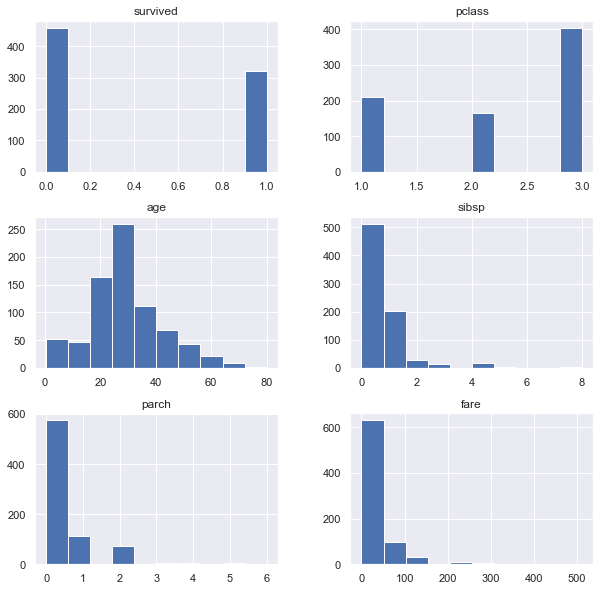

In [138]:
df.hist(figsize=(10,10));

In [139]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,0.411311,2.249357,29.760856,0.526992,0.419023,34.712987
std,0.492388,0.853206,13.674553,0.988956,0.839346,52.280326
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.250000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.812751,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.890600
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


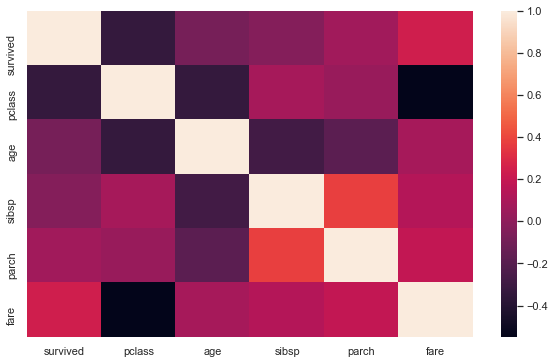

In [140]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr());

In [143]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.25,S


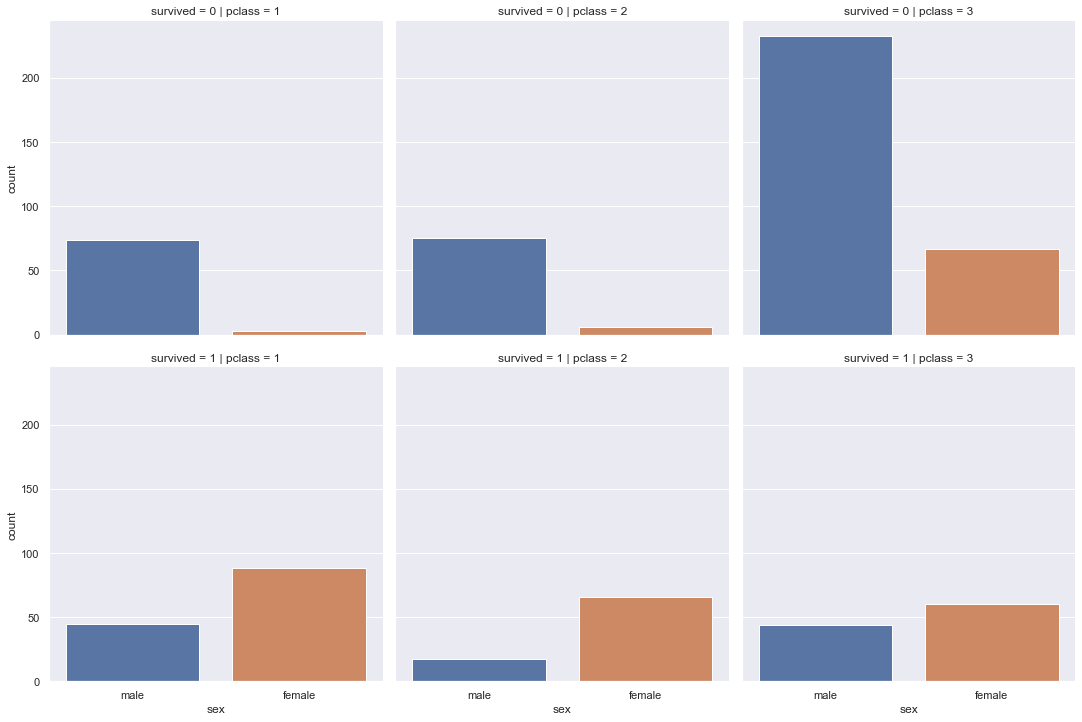

In [150]:
sns.catplot(x = 'sex', data = df, kind = 'count', col = 'pclass' , row = 'survived')

>When comparing the two genders, women had a higher chance of surviving escpecially if in pclass 1 and 2, mean had a lower chance of survival especially men in the pclass 3

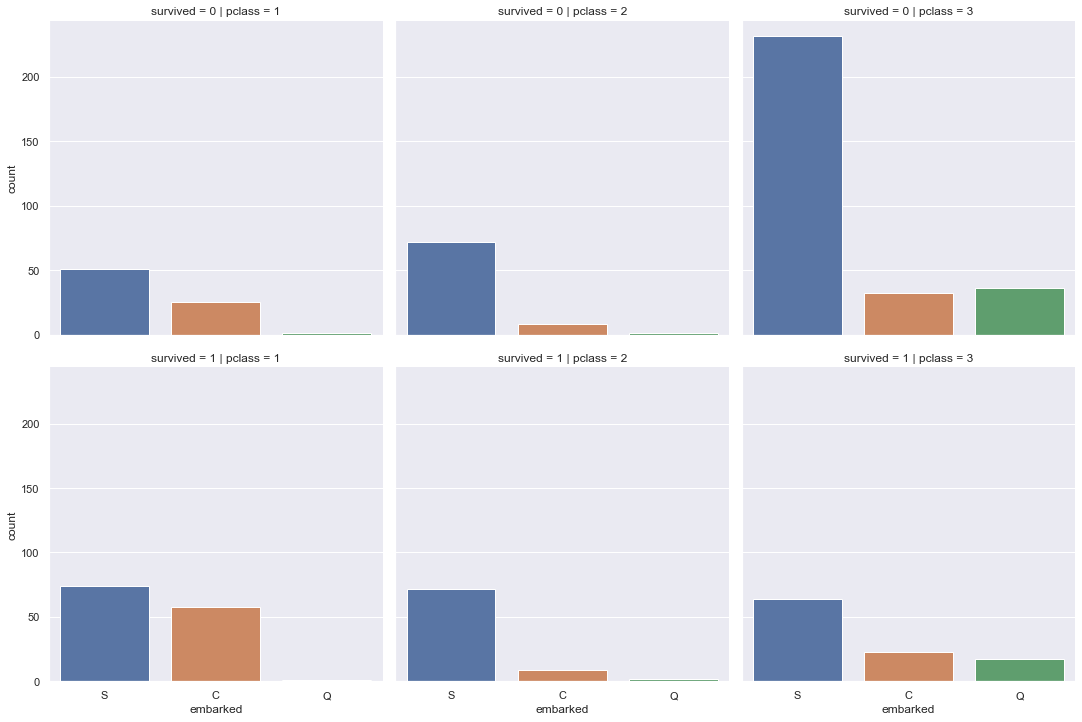

In [151]:
sns.catplot(x = 'embarked', data = df, kind = 'count', col = 'pclass' , row = 'survived')

>C = Cherbourg, Q = Queenstown, S = Southampton

> Being from Southhampton in the third class lowers your chance of surviving, as almost 300 deaths occured in this specific category. 

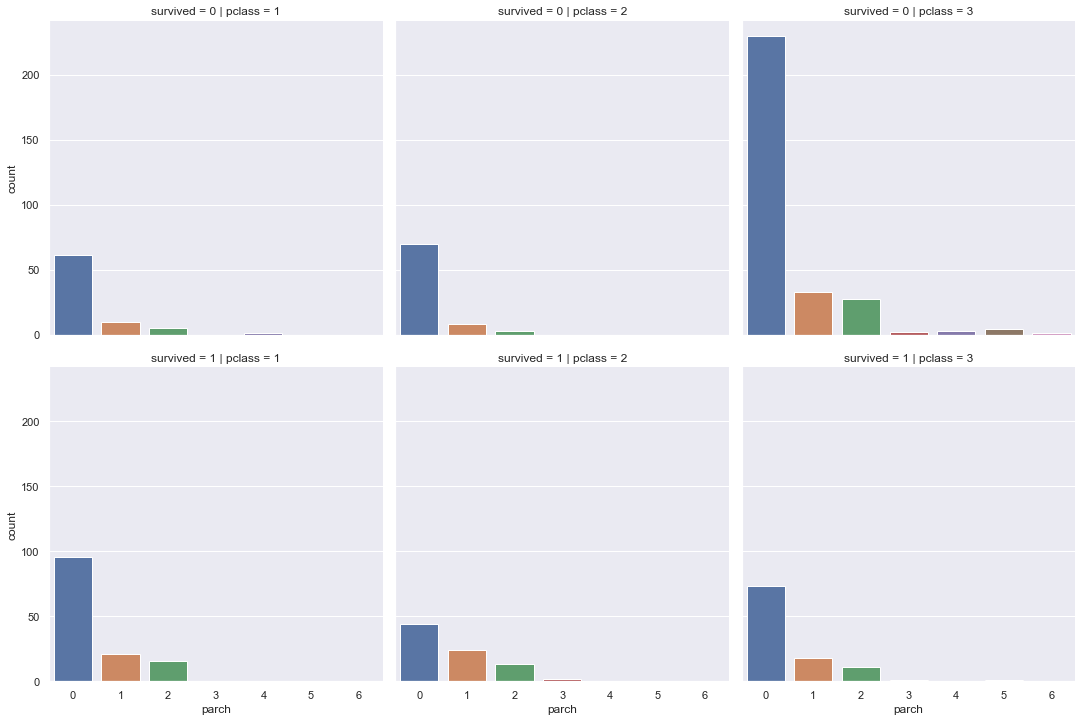

In [152]:
sns.catplot(x = 'parch', data = df, kind = 'count', col = 'pclass' , row = 'survived')

>parch # of parents / children aboard the Titanic

> Most of passengers were actually alone, but being alone in the third class means lower chance of surviving

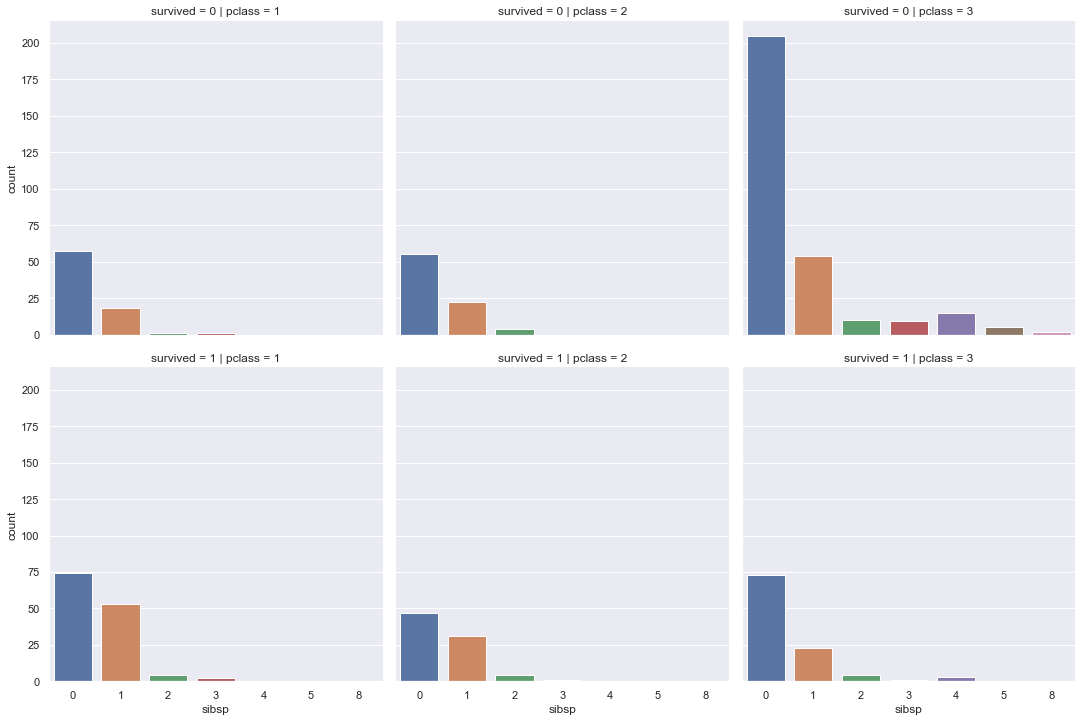

In [154]:
sns.catplot(x = 'sibsp', data = df, kind = 'count', col = 'pclass' , row = 'survived')


>sibsp = # of siblings / spouses aboard the Titanic

In [155]:
survived = df[df['survived'] == 1]
died = df[df['survived']== 0]

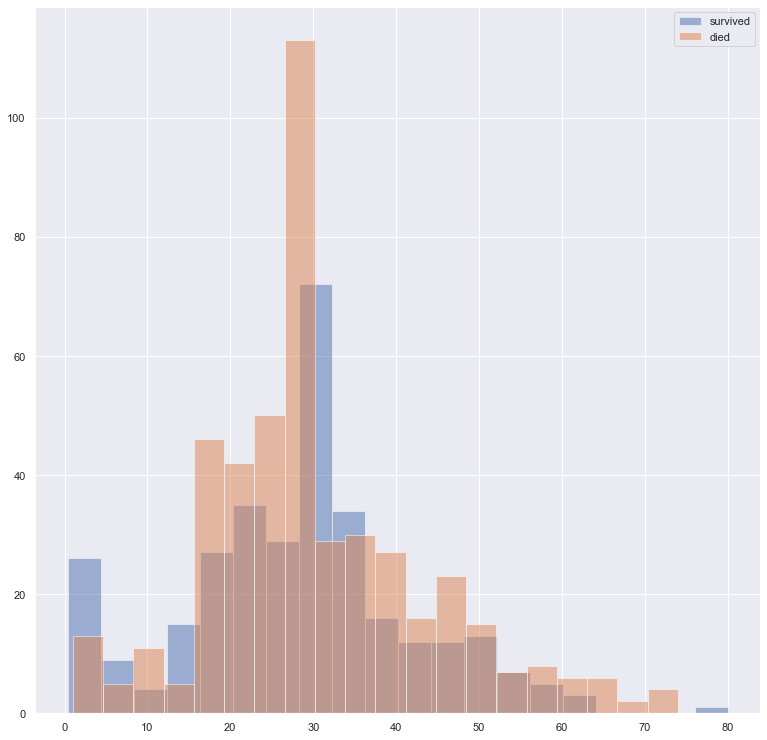

In [157]:

plt.figure(figsize=(13,13))
survived['age'].hist(alpha = 0.5, bins =20, label = 'survived')
died['age'].hist(alpha = 0.5, bins =20, label = 'died')
plt.legend()
plt.show();

> infants had a higher chace of survivng.

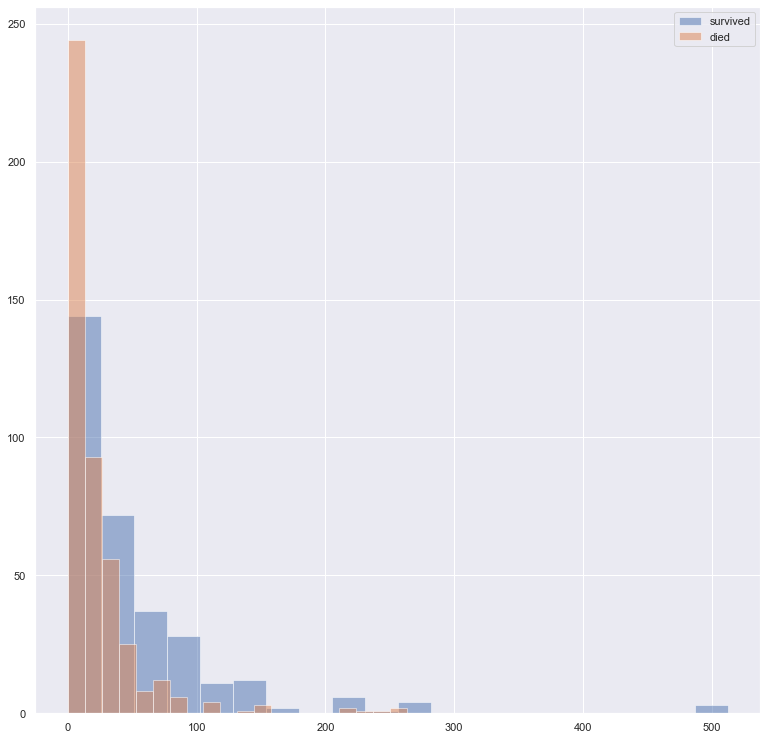

In [158]:
plt.figure(figsize=(13,13))
survived['fare'].hist(alpha = 0.5, bins =20, label = 'survived')
died['fare'].hist(alpha = 0.5, bins =20, label = 'died')
plt.legend()
plt.show();

> Passenger Fare means the revenue earned from carrying a passenger in regularly scheduled service.

> Being rich associated with a higher chance of survivng.

# Building a predictive model

In [117]:
x = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']

In [118]:
for i in x:
    df = pd.get_dummies(df, columns = [i])

In [119]:
df.head(2)

,survived,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [120]:
y = df['survived']
X = df.drop(['survived'], axis = 1)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.20, random_state=0)

In [63]:
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
preds = log_mod.predict(X_test)
confusion_matrix(y_test, preds)

C:\Users\HP\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[69, 22],
       [ 9, 56]], dtype=int64)

In [64]:
precision_score(y_test, preds)

0.717948717948718

In [65]:
recall_score(y_test, preds)

0.8615384615384616

In [66]:
accuracy_score(y_test, preds)

0.8012820512820513

<a id='conclusions'></a>
## Conclusions

>When comparing the two genders, women had a higher chance of surviving escpecially if in pclass 1 and 2, mean had a lower chance of survival especially men in the pclass 3

>Being from Southhampton in the third class lowers your chance of surviving, as almost 300 deaths occured in this specific category. 

>Most of passengers were actually alone, but being alone in the third class means lower chance of surviving

>Infants had a higher chace of survivng.

>Being rich associated with a higher chance of survivng.

>We managed to have a model with 0.7179 precision score, 0.8615 recall_score, 0.8012 accuracy score 